<a href="https://colab.research.google.com/github/Ken-huea/image-recognition/blob/main/%E6%89%8B%E6%9B%B8%E3%81%8D%E6%95%B0%E5%AD%97(kaggle)%E2%91%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 問題

一般的なデータ分析では、以下の7つのステージで進めていきます。基本的にはね。

1. 明らかにしたい問いや、問題の定義
2.訓練および検証データの取得
3.データの整形、作成、クレンジング
4.パターンの分析、特定、また探索的にデータを分析する
5.問題のモデル化、予測、解決
6.問題解決のステップと最終的な解決方法を視覚化、
7.報告,結果の提出

[下記の事柄](https://premium.aidemy.jp/courses/8070/exercises/D3zElMu5Mn)を意識して。

今回の課題は、訓練データから画像の数字を予測するモデルを作成。

検証データにこのモデルを適用しての画像の数字を予測します。⇒これがどれだけ優れているかの勝負。

# 実装

## 第一部
データの取得や確認、そして前処理と分割

### driveの紐づけからデータの取得。
そのデータの確認。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sklearn
import pandas as pd


Mounted at /content/drive


In [ ]:
import sklearn

import pandas as pd
#1. train_dfとして、/kaggle/input/digit-recognizer/train.csvをpandasで読み込みます
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN/KaggleのAidemy/train.csv')

#2. test_dfとして、/kaggle/input/digit-recognizer/test.csvをpandasで読み込みます
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN/KaggleのAidemy/test.csv')

#### train_dfとtest_dfの確認

In [ ]:
# 42000 rows × 785 columns
train_df.head(6)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# [28000 rows x 784 columns]>
test_df.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train_dfにはlabelという無駄なカラムがありますね。

これは削除したり、indexにぶち込んだり、まあやりようはあるから気にしなくてよろし。

### [探索的データ分析（EDA）](https://premium.aidemy.jp/courses/8070/exercises/ZC93Xh1duH)

こから更に、データの集計や可視化を行いデータの理解を深めていこう

今回のデータは,「０」から「9」までの多クラス分類の問題でした。⇒どうやってわかるのよ？

私が見た限りでは現時点でのトレインとテストのデータからは何も読み取れないけど？

これも何をやっていて何が分かるのか分からない。

In [ ]:
# 回答例 1
train_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
# 回答例 2
train_df.groupby('label')['pixel1'].agg('count')

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: pixel1, dtype: int64

[画像の表示](https://premium.aidemy.jp/courses/8070/exercises/oOCE0B1w8f)

正直あんありピンと来ないけど。

label 1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   

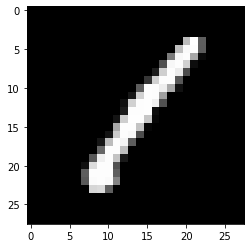

In [ ]:
import matplotlib.pyplot as plt
# 表示したい画像の行番号
i = 0 
# train_dfからpixel情報の切り出し
tmp_img = train_df.iloc[i, 1:]
# numpy arrayへの変換
tmp_img = tmp_img.values 
# shapeを784から28x28の2次元画像に変換
tmp_img = tmp_img.reshape([28, 28]) 
# labelを表示
print('label', train_df['label'][i]) 
# 値を表示
print(tmp_img) 
# 画像として表示
plt.imshow(tmp_img, cmap='gray') 
plt.show()

### [データの前処理](正規化)

説明変数となる列、目的変数となる列を指定する

説明変数: label以外の列
　　目的変数: label

In [ ]:
col_X = train_df.columns.values[1:].tolist() # train_dfのラベル以外の部分を抜き出して変数に格納。
col_Y = 'label'                              # これは何なのかよくわからない。

print('col_X', col_X)
print('col_Y', col_Y)

col_X ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

In [ ]:
# trainとtestを結合
traintest_df = pd.concat([train_df, test_df]) 

# そしてindexを割り当て直します。

traintest_df = traintest_df.reset_index(drop=True) 
print(traintest_df.shape)
traintest_df

(70000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


flgを付けてtrainとtestの境目を分かりやすくするのでしょう？

ちょっと思ってた処理と違いますが、kaggle タイタニックのflgではないの？

In [ ]:
import numpy as np

traintest_df['id'] = np.arange(len(traintest_df)) 
# 列の並び替え
traintest_df = traintest_df[['id', col_Y] + col_X] 
traintest_df.head()

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 正規化
# 値の範囲を0-255から0-1に変換
traintest_df.loc[:,col_X] = traintest_df.loc[:,col_X].values/255
traintest_df.head()

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


なるほど、こうやって再分割しているわけですね。　len(train_df)



In [ ]:
# trainとtestを再分割
train_df = traintest_df.iloc[:len(train_df)]
train_df.loc[:,col_Y] = train_df[col_Y].values.astype(int)
test_df = traintest_df.iloc[len(train_df):].reset_index(drop=True)
train_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,41995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,41996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,41997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,41998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,42000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42001,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42002,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42003,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42004,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,69995,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,69996,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,69997,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,69998,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ちゃんと正規化できているかね？あとidのカラムは不要じゃない？

これでともかく、trainとtestの正規化された状態に整いましたと。

### [バリデーションの作成](https://premium.aidemy.jp/courses/8070/exercises/zMSWOKPCWZ)

trainデータを駆使して予測モデルを作成し、testデータに当てはめ,予測を行う。という事ですね。

その為の基本ルール。

①testデータは最後の予測まで手を付けない。本当に未知(本番同様)のデータにしたいから。

②trainデータを使用して作成されたモデルの良し悪しは<font color="red">validation data</font>を用いて使います。

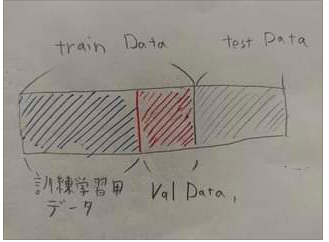

実際にはこんなシンプルに分割するなんて事そうそうありませんけどね。
データの性質を理解し適切な方法を選ぶことが必要。

- hold-out法

最も単純。学習データを訓練データと検証データに分割。

訓練データでモデルを作成後、検証データを用いてモデルを評価する。⇒イメージ通り。

- cross validation (k-fold)

hold-out法を複数回繰り返す。⇒ 訓練データに用いるデータ量を保ちつつ、データ全体を評価に用いることが可能。

回数を増やすほど学習データの量を確保でき、全てのデータを学習させた場合に近い評価だけれど、その分計算時間も増加。

繰り返し回数は一般的に5回前後で設定される場合が多い。

- stratified k-fold

分類タスクの場合に、訓練データと検証データに含まれるクラスの割合が等しくなるように層化抽出(stratified sampling)を行う分割方法。

検証データに含まれる各クラスの割合は学習データに含まれる割合と同じであるという仮定の下で、評価データをなるべく検証データに近いものにし正しく評価する目的で利用されます。

名前にk-foldがついているからその要素も入っているんでしょう？

- group k-fold

ゲームのログデータや購買履歴のデータなどでは、顧客単位でデータを分割することができます。これは、他の顧客のデータのみを利用して新たな顧客を予測したい場合などに用いられます。
具体的には、検証データにしか登場しない顧客が存在する場合、上記のような問題設定にしてモデルを作成し、未知の顧客に対しても正しく予測させる場合などがあります。

⇒ちょっとよくわからないしピンと来ないから現段階ではスルーで。

この使い分けが難しそう。

In [ ]:
from sklearn.model_selection import StratifiedKFold
# folds = [[fold0のtrainのindexのlist, fold0のvalidのindexのlist], ..., [fold4のtrainのindexのlist, fold4のvalidのindexのlist]]

folds = list(
    StratifiedKFold(
    # 分割するfoldの数  ⇒ 5位でいいでしょう。
    n_splits=5,  
    # indexの並びをshuffleするか⇒時系列じゃないから別にいいよね。
    shuffle=True, 
    # 乱数シードの指定
    random_state=42,
    ).split(
    # 説明変数の指定
    X=train_df[col_X], 
    # 目的変数の指定
    y=train_df[col_Y], 
    ))

print("fold 0 train index", folds[0][0])
print("fold 0 valid index", folds[0][1])

fold 0 train index [    1     2     4 ... 41997 41998 41999]
fold 0 valid index [    0     3     5 ... 41987 41992 41996]


これでどうなったのか知りたい。結果は？



## 第二部
予測　

### [ロジスティック回帰を用いた予測](https://premium.aidemy.jp/courses/8070/exercises/VYcGn1fPhh2)

分類予測でロジスティクスってあまりピンと来ないけど平気なの？


In [ ]:
from sklearn.linear_model import LogisticRegression

# 各fold毎に処理を行う
for (train_index, valid_index) in folds: 
    # 学習に用いる説明変数を抽出
    X_train = train_df[col_X].values[train_index] 
    # 検証に用いる説明変数を抽出
    X_valid = train_df[col_X].values[valid_index] 
    # 学習に持ちいる目的変数を抽出
    Y_train = train_df[col_Y].values[train_index] 
    # 検証に用いる目的変数を抽出
    Y_valid = train_df[col_Y].values[valid_index] 
    # 予測結果を記録する変数
    Y_pred = np.zeros([len(train_df)]) 
    
    print(X_train.shape, Y_train.shape)
    print(X_valid.shape, Y_valid.shape)
    # モデルの作成
    logreg = LogisticRegression()
    # エラーが出る場合、logreg = LogisticRegression(solver='liblinear') としてください
    # モデルの学習
    logreg.fit(X_train, Y_train) 
    # 検証データに対する予測
    Y_pred[valid_index] = logreg.predict(X_valid) 

(33600, 784) (33600,)
(8400, 784) (8400,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(33600, 784) (33600,)
(8400, 784) (8400,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(33600, 784) (33600,)
(8400, 784) (8400,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(33600, 784) (33600,)
(8400, 784) (8400,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(33600, 784) (33600,)
(8400, 784) (8400,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("fold 0 valid index", folds[0][1])
# 精度を計算
acc = (train_df[col_Y]==Y_pred).mean()
print(acc)

fold 0 valid index [    0     3     5 ... 41987 41992 41996]
0.26302380952380955


これ、全然ダメって事じゃない？　
まあパラメータチューニングはしていないけども・

数値予測みたいな可視化の方法はあるのですかね？

### [ランダムフォレストを用いた予測](https://premium.aidemy.jp/courses/8070/exercises/lhmajUimrwE)

そんなに時間かかるとは思わなんだ。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 各fold毎に処理を行う
for (train_index, valid_index) in folds:
    # 学習に用いる説明変数を抽出
    X_train = train_df[col_X].values[train_index] 
    # 検証に用いる説明変数を抽出
    X_valid = train_df[col_X].values[valid_index] 
    # 学習に持ちいる目的変数を抽出
    Y_train = train_df[col_Y].values[train_index] 
    # 検証に用いる目的変数を抽出
    Y_valid = train_df[col_Y].values[valid_index] 
    # 予測結果を記録する変数
    Y_pred = np.zeros([len(train_df)])
    
    print(X_train.shape, Y_train.shape)
    print(X_valid.shape, Y_valid.shape)
    
    # モデルの作成
    rf = RandomForestClassifier(n_estimators=500)
    # モデルの学習
    rf.fit(X_train, Y_train)
    # 検証データに対する予測
    Y_pred[valid_index] = rf.predict(X_valid)

(33600, 784) (33600,)
(8400, 784) (8400,)
(33600, 784) (33600,)
(8400, 784) (8400,)
(33600, 784) (33600,)
(8400, 784) (8400,)
(33600, 784) (33600,)
(8400, 784) (8400,)
(33600, 784) (33600,)
(8400, 784) (8400,)


In [ ]:
# 精度を計算 
acc = (train_df[col_Y]==Y_pred).mean()
print(acc)
# こんだけ待って27％かよ。

0.27216666666666667


### [MLPによる予測](https://premium.aidemy.jp/courses/8070/exercises/yTQBL-2frFP)
多層パーセプトロン (MLP)



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 予測結果を記録する変数
Y_pred = np.zeros([len(train_df)]) 

In [ ]:
y_train = to_categorical(Y_train)
y_valid = to_categorical(Y_valid)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# trainデータ
print("X_trainの形状は",X_train.shape)   # (33600, 784) ⇒ これが画像データとして意味を成しているのかな？
print("Y_trainの形状は",Y_train.shape)   # (33600, 10)  ⇒ one hotはされているみたい？

print()
# valデータ
print("X_validの形状は",X_valid.shape)   # (8400, 784)⇒ これが画像データとして意味を成しているのかな？
print("Y_validの形状は",Y_valid.shape)   # (8400, 10)  ⇒ one hotはされているみたい？

# でもカラム数は合っているみたい。だから学習そのものはできるはず…？

X_trainの形状は (33600, 784)
Y_trainの形状は (33600, 10)

X_validの形状は (8400, 784)
Y_validの形状は (8400, 10)


今やっているのは手書き数字の確認でしょう？ならば扱うのは(28＊28＊3)みたいな形状かと思ったけど。

⇒ここら辺のエータ理解が出来ていない。

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)
Epoch 1/10
263/263 [==============================] - 4s 4ms/step - loss: 0.3171 - accuracy: 0.9028 - val_loss: 0.1714 - val_accuracy: 0.9477
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1281 - accuracy: 0.9613 - val_loss: 0.1316 - val_accuracy: 0.9615
Epoch 3/10
263/263 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.9703 - val_loss: 0.1222 - val_accuracy: 0.9630
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9765 - val_loss: 0.1177 - val_accuracy: 0.9652
Epoch 5/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.1345 - val_accuracy: 0.9601
Epoch 6/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9836 - val_loss: 0.1184 - val_accuracy: 0.9667
Epoch 7/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0450 - accuracy: 0.9857 

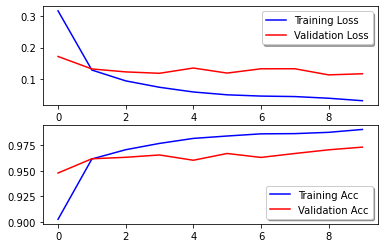

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)
Epoch 1/10
263/263 [==============================] - 1s 4ms/step - loss: 0.3209 - accuracy: 0.9047 - val_loss: 0.1813 - val_accuracy: 0.9450
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1293 - accuracy: 0.9602 - val_loss: 0.1558 - val_accuracy: 0.9512
Epoch 3/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9721 - val_loss: 0.1506 - val_accuracy: 0.9543
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0754 - accuracy: 0.9758 - val_loss: 0.1229 - val_accuracy: 0.9631
Epoch 5/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0569 - accuracy: 0.9808 - val_loss: 0.1231 - val_accuracy: 0.9667
Epoch 6/10
263/263 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.1166 - val_accuracy: 0.9671
Epoch 7/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.9853 

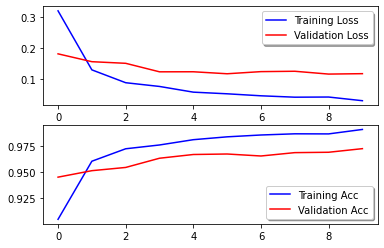

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)
Epoch 1/10
263/263 [==============================] - 2s 4ms/step - loss: 0.3231 - accuracy: 0.9024 - val_loss: 0.1730 - val_accuracy: 0.9464
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9575 - val_loss: 0.1386 - val_accuracy: 0.9575
Epoch 3/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0959 - accuracy: 0.9704 - val_loss: 0.1449 - val_accuracy: 0.9569
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9752 - val_loss: 0.1316 - val_accuracy: 0.9607
Epoch 5/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.1188 - val_accuracy: 0.9625
Epoch 6/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0501 - accuracy: 0.9832 - val_loss: 0.1140 - val_accuracy: 0.9673
Epoch 7/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9859 

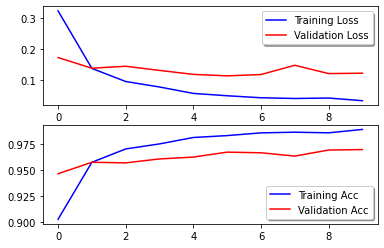

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)
Epoch 1/10
263/263 [==============================] - 2s 4ms/step - loss: 0.3166 - accuracy: 0.9064 - val_loss: 0.1643 - val_accuracy: 0.9475
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1292 - accuracy: 0.9605 - val_loss: 0.1350 - val_accuracy: 0.9595
Epoch 3/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.1304 - val_accuracy: 0.9605
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.9760 - val_loss: 0.1155 - val_accuracy: 0.9649
Epoch 5/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9786 - val_loss: 0.1111 - val_accuracy: 0.9665
Epoch 6/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 7/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0448 - accuracy: 0.9856 

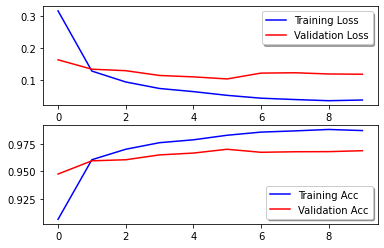

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)
Epoch 1/10
263/263 [==============================] - 2s 4ms/step - loss: 0.3064 - accuracy: 0.9088 - val_loss: 0.1790 - val_accuracy: 0.9432
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1290 - accuracy: 0.9602 - val_loss: 0.1317 - val_accuracy: 0.9604
Epoch 3/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.9718 - val_loss: 0.1102 - val_accuracy: 0.9650
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0696 - accuracy: 0.9771 - val_loss: 0.0972 - val_accuracy: 0.9696
Epoch 5/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0906 - val_accuracy: 0.9738
Epoch 6/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9840 - val_loss: 0.1007 - val_accuracy: 0.9737
Epoch 7/10
263/263 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9843 

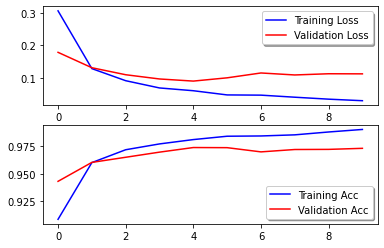

In [ ]:

# 各fold毎に処理を行う
for (train_index, valid_index) in folds: 
    # 学習に用いる説明変数を抽出
    X_train = train_df[col_X].values[train_index] 
    # 検証に用いる説明変数を抽出
    X_valid = train_df[col_X].values[valid_index] 
    # 学習に持ちいる目的変数を抽出
    Y_train = train_df[col_Y].values[train_index] 
    # 検証に用いる目的変数を抽出
    Y_valid = train_df[col_Y].values[valid_index] 
    
    Y_train = to_categorical(Y_train)
    Y_valid = to_categorical(Y_valid)
    
    print(X_train.shape, Y_train.shape)
    print(X_valid.shape, Y_valid.shape)
    # モデルの作成
    # 784(input) -> 512(relu) -> 256(relu) -> 128(relu) -> 64(relu) -> 10(sigmoid) のニューラルネットを作成してください
    model = Sequential([
        Dense(512, input_dim=784),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10,activation = 'sigmoid'),
        ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    history = model.fit(X_train, Y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_valid, Y_valid))
    Y_pred[valid_index] = np.argmax(model.predict(X_valid),axis=1)
    
    # 学習曲線を可視化
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training Loss")
    ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['accuracy'], color='b', label="Training Acc")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Acc")
    legend = ax[1].legend(loc='best', shadow=True)
    plt.show()

In [ ]:
# 精度を計算
acc = (train_df[col_Y]==Y_pred).mean()
print(acc)

0.9684047619047619


何故か凄く良くなった。

### CNNによる予測(dropout込み)
[リンクはこちら](https://premium.aidemy.jp/courses/8070/exercises/RFY2mIOplrb)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D, MaxPool2D,Flatten,Dropout

In [ ]:
# 予測結果を記録する変数
Y_pred = np.zeros([len(train_df)]) 

(33600, 28, 28, 1) (33600, 10)
(8400, 28, 28, 1) (8400, 10)
Epoch 1/10
263/263 [==============================] - 17s 15ms/step - loss: 0.2146 - accuracy: 0.9325 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 2/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 3/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 4/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0418 - val_accuracy: 0.9881
Epoch 5/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 6/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.0527 - val_accuracy: 0.9861
Epoch 7/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0140

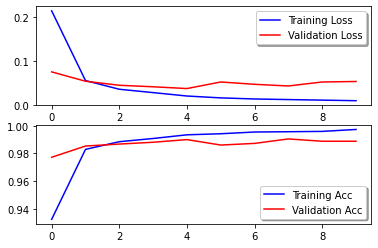

(33600, 28, 28, 1) (33600, 10)
(8400, 28, 28, 1) (8400, 10)
Epoch 1/10
263/263 [==============================] - 4s 13ms/step - loss: 0.2183 - accuracy: 0.9337 - val_loss: 0.0655 - val_accuracy: 0.9783
Epoch 2/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0469 - val_accuracy: 0.9837
Epoch 3/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 4/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0398 - val_accuracy: 0.9870
Epoch 5/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0422 - val_accuracy: 0.9867
Epoch 6/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0319 - val_accuracy: 0.9902
Epoch 7/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0171 

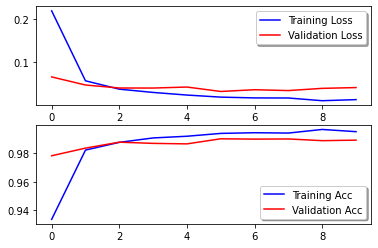

(33600, 28, 28, 1) (33600, 10)
(8400, 28, 28, 1) (8400, 10)
Epoch 1/10
263/263 [==============================] - 4s 13ms/step - loss: 0.2035 - accuracy: 0.9345 - val_loss: 0.0746 - val_accuracy: 0.9785
Epoch 2/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0548 - val_accuracy: 0.9848
Epoch 3/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0437 - val_accuracy: 0.9870
Epoch 4/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0424 - val_accuracy: 0.9876
Epoch 5/10
263/263 [==============================] - 4s 17ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9898
Epoch 6/10
263/263 [==============================] - 4s 14ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0515 - val_accuracy: 0.9876
Epoch 7/10
263/263 [==============================] - 4s 15ms/step - loss: 0.0176 

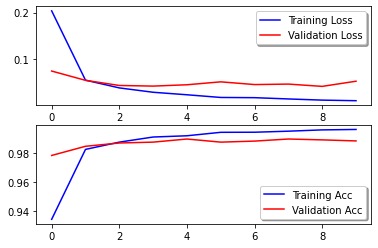

(33600, 28, 28, 1) (33600, 10)
(8400, 28, 28, 1) (8400, 10)
Epoch 1/10
263/263 [==============================] - 4s 13ms/step - loss: 0.2180 - accuracy: 0.9326 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 2/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 3/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0399 - accuracy: 0.9866 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 4/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0398 - val_accuracy: 0.9880
Epoch 5/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 6/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 7/10
263/263 [==============================] - 3s 12ms/step - loss: 0.0166 

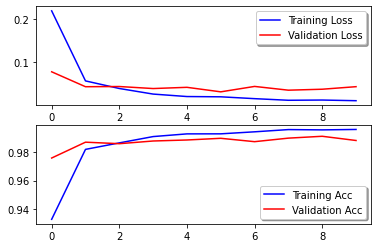

(33600, 28, 28, 1) (33600, 10)
(8400, 28, 28, 1) (8400, 10)
Epoch 1/10
263/263 [==============================] - 4s 13ms/step - loss: 0.2163 - accuracy: 0.9299 - val_loss: 0.0752 - val_accuracy: 0.9774
Epoch 2/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0575 - accuracy: 0.9815 - val_loss: 0.0509 - val_accuracy: 0.9855
Epoch 3/10
263/263 [==============================] - 4s 14ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 4/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 5/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0420 - val_accuracy: 0.9894
Epoch 6/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0379 - val_accuracy: 0.9895
Epoch 7/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0156 

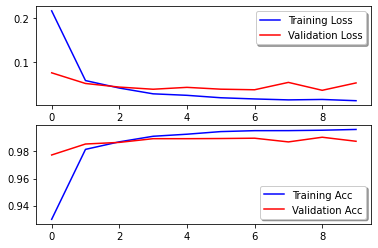

In [ ]:
# 各fold毎に処理を行う
for (train_index, valid_index) in folds: 
    # 学習に用いる説明変数を抽出
    X_train = train_df[col_X].values[train_index] 
    # 検証に用いる説明変数を抽出
    X_valid = train_df[col_X].values[valid_index] 
    # 学習に持ちいる目的変数を抽出
    Y_train = train_df[col_Y].values[train_index] 
    # 検証に用いる目的変数を抽出
    Y_valid = train_df[col_Y].values[valid_index] 
    
    X_train = X_train.reshape(-1,28,28,1)
    X_valid = X_valid.reshape(-1,28,28,1)
    
    Y_train = to_categorical(Y_train)
    Y_valid = to_categorical(Y_valid)
    
    print(X_train.shape, Y_train.shape)
    print(X_valid.shape, Y_valid.shape)
    # モデルの作成
    model = Sequential([
        Conv2D(
            filters = 32, kernel_size = (5,5),padding = 'Same',
            activation ='relu', input_shape = (28,28,1)
        ),
        Conv2D(
            filters = 32, kernel_size = (5,5),padding = 'Same', 
            activation ='relu'
        ),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),
        Conv2D(
            filters = 64, kernel_size = (3,3),padding = 'Same', 
            activation ='relu'
        ),
        Conv2D(
            filters = 64, kernel_size = (3,3),padding = 'Same', 
            activation ='relu'
        ),
        # ドロップアウト層(rate=0.25)を追加してください
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10,activation = 'sigmoid'),
        ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    history = model.fit(X_train, Y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_valid, Y_valid))
    Y_pred[valid_index] = np.argmax(model.predict(X_valid),axis=1)
    
    # 学習曲線を可視化
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training Loss")
    ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['accuracy'], color='b', label="Training Acc")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Acc")
    legend = ax[1].legend(loc='best', shadow=True)
    plt.show()

In [ ]:
# 精度を計算
acc = (train_df[col_Y]==Y_pred).mean()
print(acc)

0.9878809523809524
